In [43]:
import pandas as pd 

In [44]:
data=pd.read_csv("food_orders_new_delhi.csv")
print(data.shape)
data.head()

(1000, 12)


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


## Data cleaning

- Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.
- Convert “Discounts and Offers” to a consistent numeric value and calculate the discount amounts.
- Ensure all monetary values are in a suitable format for calculations.

In [46]:
data['Order Date and Time']=pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time']=pd.to_datetime(data['Delivery Date and Time'])

In [47]:
data['Discounts and Offers'].value_counts()

Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
5% on App       183
Name: count, dtype: int64

In [50]:
def extract_discount_quant(discount_str):
    if isinstance(discount_str, float):
        return discount_str
    else:
        return discount_str.split(' ')[0]

In [51]:
data['Discounts and Offers']=data['Discounts and Offers'].apply(lambda x:extract_discount_quant(x))

In [52]:
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5%,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15%,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50,130,50,0


In [72]:
def amount_extract(discount_str,order_value):
    if isinstance(discount_str,float):
        return discount_str
    elif '%' in discount_str:
        a=float(discount_str.split('%')[0])
        return order_value*a/100
    elif discount_str is None:
        return 0.0
    else:
        return float(discount_str)

In [73]:
data['Discount_amount']=data.apply(lambda x:amount_extract(x['Discounts and Offers'],x['Order Value']),axis=1)

In [74]:
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount_amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5%,150,47,0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15%,195,45,0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,NaN
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50,130,50,0,50.00


In [75]:
data['Discount_amount'].fillna(0.0,inplace=True)

In [76]:
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount_amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5%,150,47,0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15%,195,45,0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50,130,50,0,50.00


# Cost and Profitability Analysis

For the cost analysis, we’ll consider the following costs associated with each order:

- Delivery Fee: The fee charged for delivering the order.
- Payment Processing Fee: The fee for processing the payment.
- Discount Amount: The discount provided on the order.

The revenue for the platform is mainly derived from the Commission Fee. I’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [79]:
# Calculating Total profit per order
data['Total costs']=data['Delivery Fee']+data['Payment Processing Fee']+data['Discount_amount']+data['Refunds/Chargebacks']
data['Revenue']=data['Commission Fee'].copy()
data['Total Profit']=data['Revenue']-data['Total costs']

In [81]:
data.head(2)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount_amount,Total costs,Revenue,Total Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5%,150,47,0,95.7,142.7,150,7.3
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,98.6,161.6,198,36.4


In [92]:
# for getting overall metrics
total_orders=data.shape[0]
total_revenue=data['Revenue'].sum()
total_cost=data['Total costs'].sum()
total_profit=round(data['Total Profit'].sum(),2)

all_metrics={'Total Orders':total_orders,
             'Total Revenue':total_revenue,
             'Total Costs':total_cost,
             'Total Profit':total_profit}

print(all_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 161041.85, 'Total Profit': -34051.85}


Insights:  The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

To better understand the distribution of costs, revenue, and profit, let’s plot:

- A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
- A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
- A bar chart to compare total revenue, total costs, and total profit

In [93]:
import matplotlib.pyplot as plt

#### Profit per order 

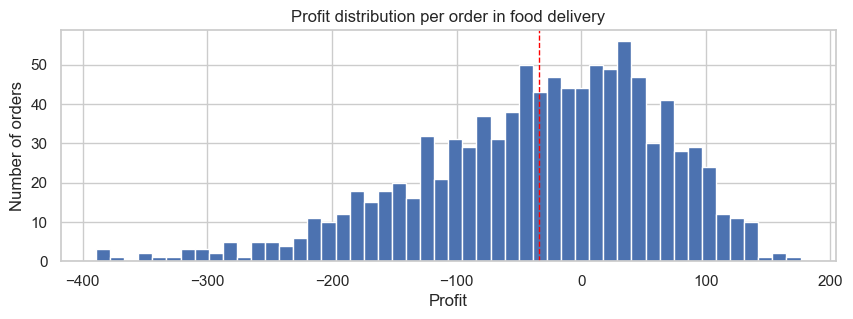

In [99]:
plt.figure(figsize=(10,3))

plt.hist(data['Total Profit'],bins=50)
plt.title('Profit distribution per order in food delivery')
plt.xlabel('Profit')
plt.ylabel('Number of orders')
plt.axvline(data['Total Profit'].mean(),color='red',linestyle='dashed',linewidth=1)
plt.show()

Insights:  The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

#### Proportion of total costs

In [114]:
cost_breakdown=data[['Delivery Fee','Payment Processing Fee','Discount_amount','Refunds/Chargebacks']].sum()
cost_breakdown.index

Index(['Delivery Fee', 'Payment Processing Fee', 'Discount_amount',
       'Refunds/Chargebacks'],
      dtype='object')

In [124]:
data['Discount_amount']=data['Discount_amount'].astype('int64')

In [125]:
cost_breakdown.dtypes

dtype('int64')

In [129]:
cost_breakdown.isnull().sum()

0

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  Discount_amount         1000 non-null   int64    

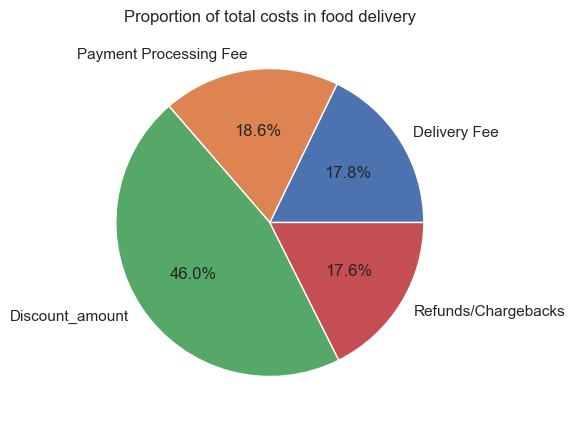

In [139]:
cost_breakdown=data[['Delivery Fee','Payment Processing Fee','Discount_amount','Refunds/Chargebacks']].sum()
plt.figure(figsize=(5,5))
plt.pie(cost_breakdown,labels=cost_breakdown.index,autopct='%1.1f%%')
plt.title('Proportion of total costs in food delivery')
plt.show()

Insights:  The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

#### Comparing total revenue, total costs, and total profit (total loss in this case):

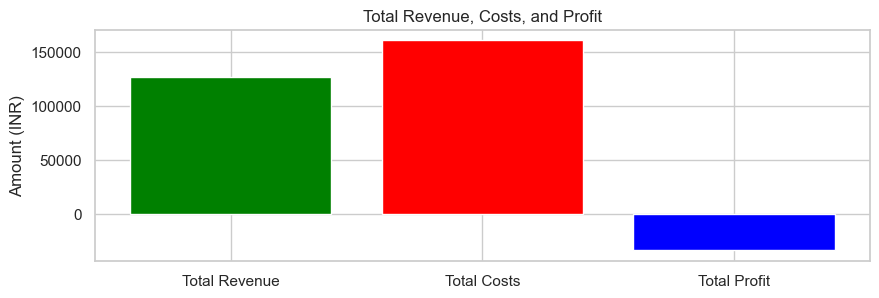

In [146]:
totals=['Total Revenue','Total Costs','Total Profit']
values=[total_revenue,total_cost,total_profit]

plt.figure(figsize=(10,3))

plt.bar(totals,values,color=['green','red','blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

Insights: The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

#### The average commission percentage for profitable orders.

In [147]:
data.head(2)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount_amount,Total costs,Revenue,Total Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5%,150,47,0,95,142.7,150,7.3
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,98,161.6,198,36.4


In [149]:
profitable_orders=data[data['Total Profit']>0]
profitable_orders['Commission percentage']=100*(profitable_orders['Commission Fee']/profitable_orders['Order Value'])
profitable_orders['Effective Discount Percentage']=100*(profitable_orders['Discount_amount']/profitable_orders['Order Value'])
new_avg_commission_percent=profitable_orders['Commission percentage'].mean()
new_avg_eff_discount_percent=profitable_orders['Effective Discount Percentage'].mean()
print(new_avg_commission_percent,new_avg_eff_discount_percent)

28.721297744525607 5.549540251603594


C:\Users\User\AppData\Local\Temp\ipykernel_8784\2901904494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission percentage']=100*(profitable_orders['Commission Fee']/profitable_orders['Order Value'])
C:\Users\User\AppData\Local\Temp\ipykernel_8784\2901904494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage']=100*(profitable_orders['Discount_amount']/profitable_orders['Order Value'])
